In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
TextFileReader1 = pd.read_csv(r'SurveyI.csv',error_bad_lines=False,chunksize=1000)

df1List = []
for df in TextFileReader1:
    df1List.append(df)
    
df1 = pd.concat(df1List,sort=False)
df1 = df1.replace(' ',-1)
df1 = df1.astype('int64',errors='ignore')
df1 = df1.apply(lambda x: x.astype('int64',errors='ignore'))
df1 = df1.apply(lambda x: x.astype('float64',errors='ignore') if x.dtype == 'O' else x)

TextFileReader2 = pd.read_csv(r'SurveyII.csv',error_bad_lines=False,chunksize=1000)

dfList2 = []
for df in TextFileReader2:
    dfList2.append(df)
    
df2 = pd.concat(dfList2,sort=False)
df2 = df2.replace(' ',-1)
df2 = df2.astype('int64',errors='ignore')
df2 = df2.apply(lambda x: x.astype('int64',errors='ignore'))
df2 = df2.apply(lambda x: x.astype('float64',errors='ignore') if x.dtype == 'O' else x)

TextFileReader3 = pd.read_csv(r'SurveyIIInew.csv',error_bad_lines=False,chunksize=1000)

dfList3 = []
for df in TextFileReader3:
    dfList3.append(df)
    
df3 = pd.concat(dfList3,sort=False)
df3 = df3.replace(' ',-1) #updating null values to -1
df3 = df3.astype('int64',errors='ignore')
df3 = df3.apply(lambda x: x.astype('int64',errors='ignore'))
df3 = df3.apply(lambda x: x.astype('float64',errors='ignore') if x.dtype == 'O' else x)

In [4]:
#height
df1['NQ49'] = df1.NQ49_FT * 12 + df1.NQ49_IN

In [5]:
df1_bool = ((df1['NQ49'] >= 47.2441) & (df1['NQ49'] <= 82.6772) & (df1['NQ50'] >= 77.16) & (df1['NQ50'] <= 396.832) & (df1['BMI'] >= 16) & (df1['BMI'] <= 65))
df1 = df1[df1_bool]
df2_bool = ((df2['NQ49'] >= 47.2441) & (df2['NQ49'] <= 82.6772) & (df2['NQ50'] >= 77.16) & (df2['NQ50'] <= 396.832) & (df2['BMI'] >= 16) & (df2['BMI'] <= 65))
df2 = df2[df2_bool]
df3_bool = ((df3['NQ49'] >= 47.2441) & (df3['NQ49'] <= 82.6772) & (df3['NQ50'] >= 77.16) & (df3['NQ50'] <= 396.832) & (df3['BMI'] >= 16) & (df3['BMI'] <= 65))
df3 = df3[df3_bool]
data_ocd = pd.concat([df1,df2,df3],axis=0,sort = True).reset_index()
#removing columns with more than 10% of null values
data_ocd = data_ocd.loc[:, data_ocd.isnull().mean() < .1]

In [6]:
data_ocd.head()

,index,ACHAMEM,BAC,BMI,HBCU,HHE,HS,LOCALE,NQ31A1,NQ31A2,...,RBAC1,RBAC2,RBMI,REGION,REL,STUDY,TCU,TYPE,pwno,size
0,0,1,0.009290,21.708105,-1,-1,-1,1,1,1,...,0,0,2,4,2,21,-1,2,2,5
1,1,1,0.000000,31.247858,-1,-1,-1,1,1,1,...,0,0,4,4,2,21,-1,2,2,5
2,2,1,0.000000,19.766432,-1,-1,-1,1,1,1,...,0,0,2,4,2,21,-1,2,2,5
3,3,1,0.108112,22.459398,-1,-1,-1,1,1,4,...,1,1,2,4,2,21,-1,2,2,5
4,4,1,0.000000,26.631697,-1,-1,-1,1,1,1,...,0,0,3,4,2,21,-1,2,2,5


In [7]:
anxiety_df = data_ocd.loc[data_ocd['NQ31A2'] != -1]
anxiety_df['Boolean'] = np.where((anxiety_df.NQ31A2 == 1), 0, 1)
study_value = anxiety_df['STUDY'].value_counts(sort=False)
anxiety_pivot_df = anxiety_df.pivot_table(index = ['STUDY'],columns=['Boolean'],aggfunc = 'size',observed=True)
anxiety_pivot_df = anxiety_pivot_df.div(study_value,axis=0)
anxiety_pivot_df = anxiety_pivot_df.multiply(100)
sum_of_rows = anxiety_pivot_df.sum(axis=1)
normalized_array = anxiety_pivot_df / sum_of_rows[:, np.newaxis]

/Users/leo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
ocd_df = data_ocd.loc[data_ocd['NQ31B1'] != -1]
ocd_df['Boolean'] = np.where((ocd_df.NQ31B1 == 1), 0, 1)
study_value = ocd_df['STUDY'].value_counts(sort=False)
ocd_pivot_df = ocd_df.pivot_table(index = ['STUDY'],columns=['Boolean'],aggfunc = 'size',observed=True)
ocd_pivot_df = ocd_pivot_df.div(study_value,axis=0)
ocd_pivot_df = ocd_pivot_df.multiply(100)
sum_of_rows = ocd_pivot_df.sum(axis=1)
normalized_array = ocd_pivot_df / sum_of_rows[:, np.newaxis]

/Users/leo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
depression_df = data_ocd.loc[data_ocd['NQ31A6'] != -1]
depression_df['Boolean'] = np.where((depression_df.NQ31A6 == 1), 0, 1)
study_value = depression_df['STUDY'].value_counts(sort=False)
depression_pivot_df = depression_df.pivot_table(index = ['STUDY'],columns=['Boolean'],aggfunc = 'size',observed=True)
depression_pivot_df = depression_pivot_df.div(study_value,axis=0)
depression_pivot_df = depression_pivot_df.multiply(100)
sum_of_rows = depression_pivot_df.sum(axis=1)
normalized_array = depression_pivot_df / sum_of_rows[:, np.newaxis]

/Users/leo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
panic_df = data_ocd.loc[data_ocd['NQ31B2'] != -1]
panic_df['Boolean'] = np.where((panic_df.NQ31B2 == 1), 0, 1)
study_value = panic_df['STUDY'].value_counts(sort=False)
panic_pivot_df = panic_df.pivot_table(index = ['STUDY'],columns=['Boolean'],aggfunc = 'size',observed=True)
panic_pivot_df = panic_pivot_df.div(study_value,axis=0)
panic_pivot_df = panic_pivot_df.multiply(100)
sum_of_rows = panic_pivot_df.sum(axis=1)
normalized_array = panic_pivot_df / sum_of_rows[:, np.newaxis]

/Users/leo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
adhd_df = data_ocd.loc[data_ocd['NQ31A3'] != -1]
adhd_df['Boolean'] = np.where((adhd_df.NQ31A3 == 1), 0, 1)
study_value = adhd_df['STUDY'].value_counts(sort=False)
adhd_pivot_df = adhd_df.pivot_table(index = ['STUDY'],columns=['Boolean'],aggfunc = 'size',observed=True)
adhd_pivot_df = adhd_pivot_df.div(study_value,axis=0)
adhd_pivot_df = adhd_pivot_df.multiply(100)
sum_of_rows = adhd_pivot_df.sum(axis=1)
normalized_array = adhd_pivot_df / sum_of_rows[:, np.newaxis]

/Users/leo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
insomnia_df = data_ocd.loc[data_ocd['NQ31A7'] != -1]
insomnia_df['Boolean'] = np.where((insomnia_df.NQ31A7 == 1), 0, 1)
study_value = insomnia_df['STUDY'].value_counts(sort=False)
insomnia_pivot_df = insomnia_df.pivot_table(index = ['STUDY'],columns=['Boolean'],aggfunc = 'size',observed=True)
insomnia_pivot_df = insomnia_pivot_df.div(study_value,axis=0)
insomnia_pivot_df = insomnia_pivot_df.multiply(100)
sum_of_rows = insomnia_pivot_df.sum(axis=1)
normalized_array = insomnia_pivot_df / sum_of_rows[:, np.newaxis]

/Users/leo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
label_ = []
k = 0
j = 2008
for i in range(18,40):
    if(k == 0):
        label_.append("Fall" + str(j))
        k = 1
        j += 1
    else:
        label_.append("Spring" + str(j))
        k = 0

In [14]:
study_value = anxiety_df['STUDY'].value_counts(sort=False)
pivot_df = anxiety_df.pivot_table(index = ['STUDY'],columns=['Boolean'],aggfunc = 'size',observed=True)
pivot_df = pivot_df.div(study_value,axis=0)
pivot_df = pivot_df.multiply(100)

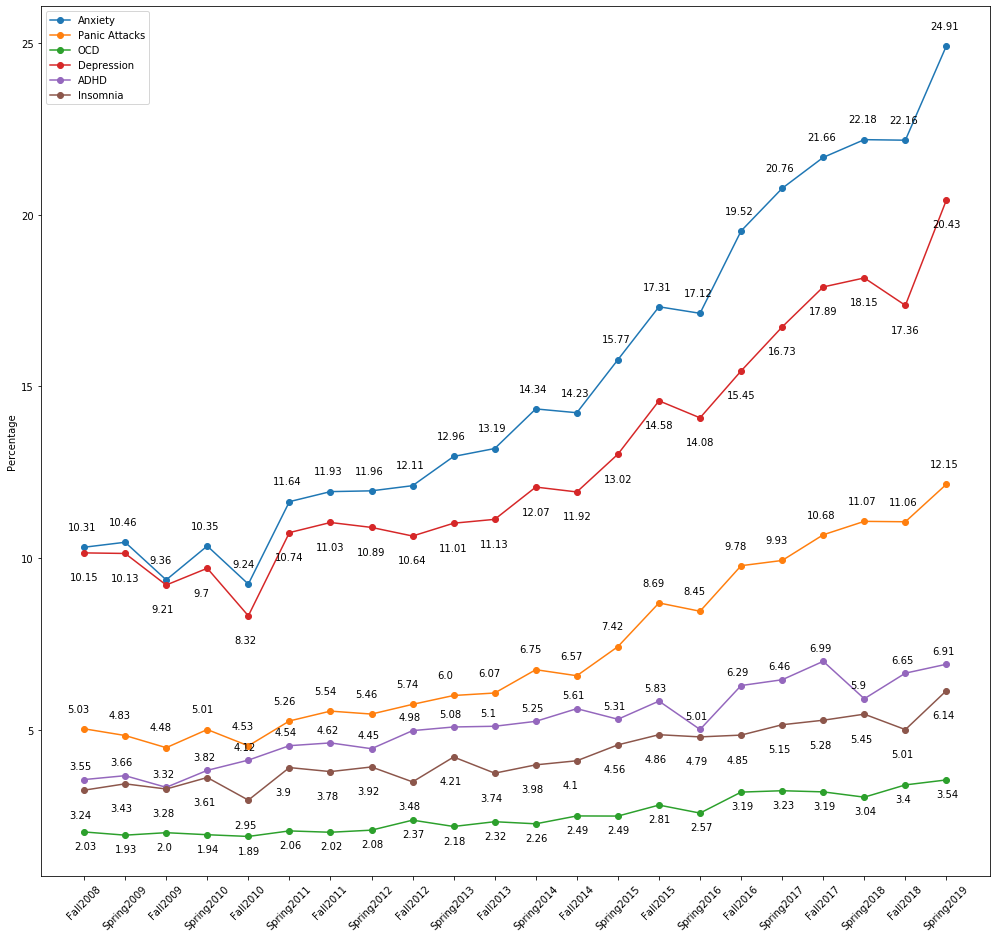

In [15]:
fig, ax = plt.subplots(figsize=(17,16))
for i,j in ocd_pivot_df[1].items():
    ax.annotate(str(round(j,2)), xy=(i-0.25, j-0.5))
for i,j in anxiety_pivot_df[1].items():
    ax.annotate(str(round(j,2)), xy=(i-0.40, j+0.5))
for i,j in depression_pivot_df[1].items():
    ax.annotate(str(round(j,2)), xy=(i-0.35, j-0.8))
for i,j in panic_pivot_df[1].items():
    ax.annotate(str(round(j,2)), xy=(i-0.40, j+0.5))
for i,j in adhd_pivot_df[1].items():
    ax.annotate(str(round(j,2)), xy=(i-0.35, j+0.3))
for i,j in insomnia_pivot_df[1].items():
    ax.annotate(str(round(j,2)), xy=(i-0.35, j-0.8))
ax.plot(anxiety_pivot_df[1],marker='o',label='Anxiety')
ax.plot(panic_pivot_df[1],marker='o',label='Panic Attacks')
ax.plot(ocd_pivot_df[1],marker='o',label='OCD')
ax.plot(depression_pivot_df[1],marker='o',label='Depression')
ax.plot(adhd_pivot_df[1],marker='o',label='ADHD')
ax.plot(insomnia_pivot_df[1],marker='o',label='Insomnia')
ax.set_xticks(pivot_df.index)
ax.set_xticklabels(label_,rotation = 45)
ax.set_ylabel("Percentage")
ax.legend(loc='best')
height_prev = np.zeros(22)
fig.savefig('ocd_figure.png')

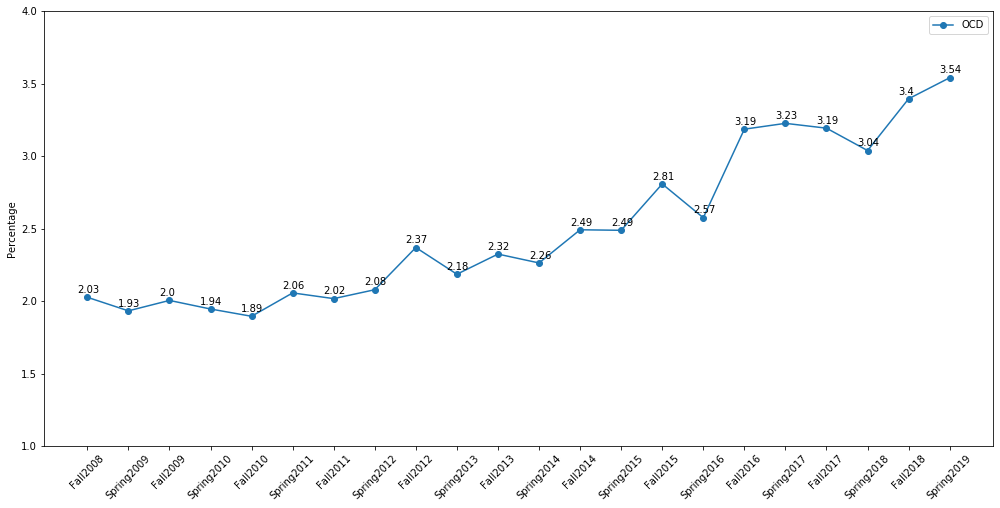

In [24]:
fig, ax = plt.subplots(figsize=(17,8))
for i,j in ocd_pivot_df[1].items():
    ax.annotate(str(round(j,2)), xy=(i-0.25, j+0.03))

ax.set_ylim([1,4])
ax.plot(ocd_pivot_df[1],marker='o',label='OCD')
ax.set_xticks(pivot_df.index)
ax.set_xticklabels(label_,rotation = 45)
ax.set_ylabel("Percentage")
ax.legend(loc='best')
height_prev = np.zeros(22)
fig.savefig('ocd_figure_1_4.png')

In [17]:
# ax = anxiety_pivot_df[1].plot.line(figsize=(17,12),marker='o')
# for i,j in ocd_pivot_df[1].items():
#     ax.annotate(str(round(j,2)), xy=(i-0.25, j+0.5))
# for i,j in anxiety_pivot_df[1].items():
#     ax.annotate(str(round(j,2)), xy=(i-0.45, j+1))
# for i,j in depression_pivot_df[1].items():
#     ax.annotate(str(round(j,2)), xy=(i-0.40, j-1))
# ax.plot(ocd_pivot_df[1],marker='o')
# ax.plot(depression_pivot_df[1],marker='o')
# ax.set_xticks(pivot_df.index)
# ax.set_xticklabels(label_,rotation = 45)
# ax.set_ylabel("Percentage")
# ax.legend(loc='best')
# height_prev = np.zeros(22)

In [18]:
for i,j in ocd_pivot_df[1].items():
    ax.annotate(str(j), xy=(i, j))